<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


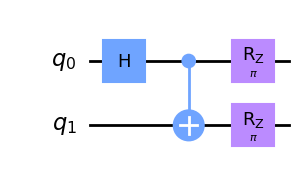

In [2]:
from qiskit import QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_state_city
import numpy as np
bell_pair = QuantumCircuit(2)
bell_pair.h(0)
bell_pair.cx(0,1)
bell_pair.rz(np.pi, 0)
bell_pair.rz(np.pi, 1)
bell_pair.draw('mpl')


In [3]:
backend = QuantumInstance(backend = AerSimulator(method = 'statevector'))
np.array(backend.execute(bell_pair).results[0].data.statevector)

array([-0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j,
        0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j])

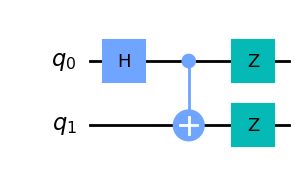

In [4]:
bell_pair = QuantumCircuit(2)
bell_pair.h(0)
bell_pair.cx(0,1)
bell_pair.z(0)
bell_pair.z(1)
bell_pair.draw('mpl')

In [5]:
backend = AerSimulator(method = 'statevector')
backend.run(bell_pair).result()

Result(backend_name='aer_simulator_statevector', backend_version='0.11.2', qobj_id='9ae986fb-5210-4d18-b749-c631dba3d0e5', job_id='ebf9b884-9153-450b-8501-cbae371c03b9', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata={}, n_qubits=2, name='circuit-92', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=838863980, metadata={'parallel_state_update': 8, 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_shots': 1, 'device': 'CPU', 'active_input_qubits': [], 'measure_sampling': False, 'num_clbits': 0, 'input_qubit_map': [], 'num_qubits': 0, 'method': 'statevector'}, time_taken=1.9458e-05)], date=2023-03-20T15:03:07.162307, status=COMPLETED, header=QobjHeader(backend_name='aer_simulator_statevector', backend_version='0.11.2'), metadata={'mpi_rank': 0, 'num_mpi_processes': 

In [6]:
from codes import L_qubit

In [7]:
LQ1 = L_qubit()
LQ2 = L_qubit()

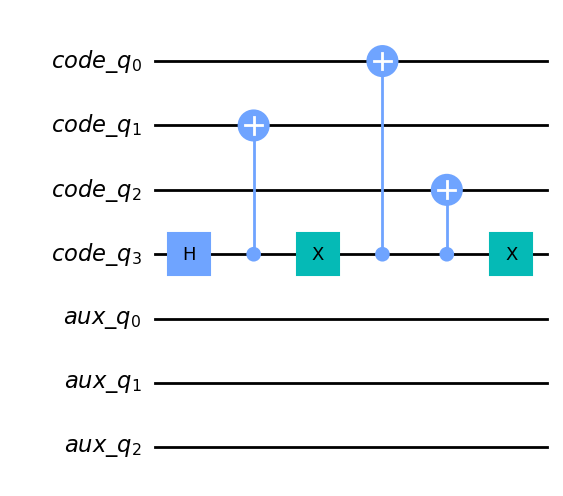

In [8]:
LQ1.lq_circ.draw('mpl')

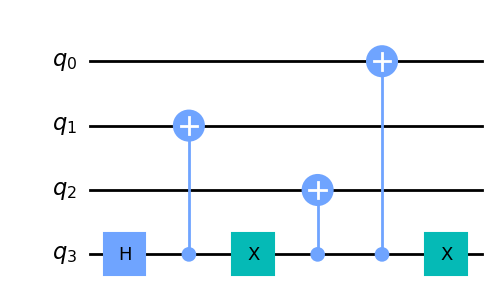

In [9]:
four_q_bell = QuantumCircuit(4)
four_q_bell.h(3)
four_q_bell.cx(3,1)
four_q_bell.x(3)
four_q_bell.cx(3,2)
four_q_bell.cx(3,0)
four_q_bell.x(3)
four_q_bell.draw('mpl')

In [10]:
backend.run(bell_pair).result()

Result(backend_name='aer_simulator_statevector', backend_version='0.11.2', qobj_id='6dc85b8c-5baf-4d8e-84ba-a00414983979', job_id='d5029eb6-4d78-4ad6-b9fd-6e6aa31f197f', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata={}, n_qubits=2, name='circuit-92', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=1049849368, metadata={'parallel_state_update': 8, 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_shots': 1, 'device': 'CPU', 'active_input_qubits': [], 'measure_sampling': False, 'num_clbits': 0, 'input_qubit_map': [], 'num_qubits': 0, 'method': 'statevector'}, time_taken=9.2e-05)], date=2023-03-20T15:03:07.608818, status=COMPLETED, header=QobjHeader(backend_name='aer_simulator_statevector', backend_version='0.11.2'), metadata={'mpi_rank': 0, 'num_mpi_processes': 1,

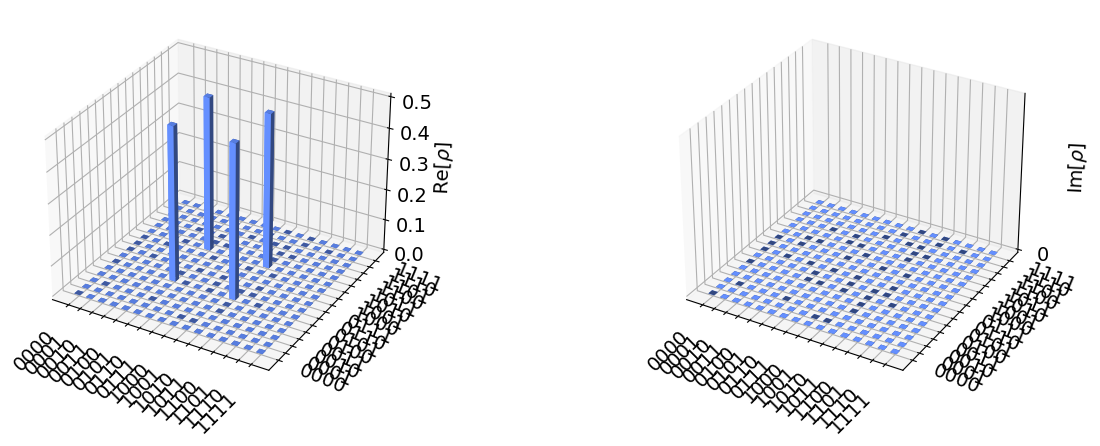

In [11]:
plot_state_city(four_q_bell)

In [12]:
from codes import Z_l, X_l

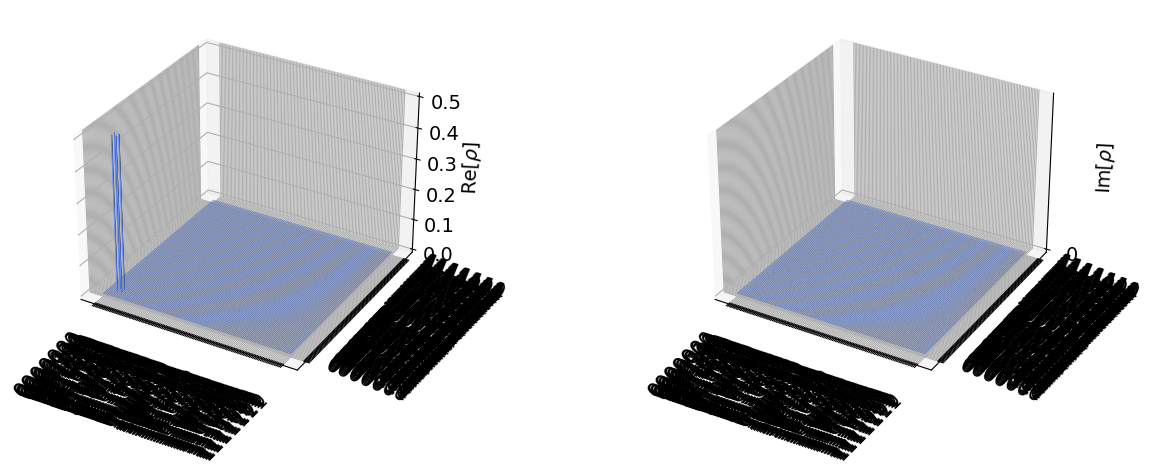

In [13]:
X_l(LQ1.lq_circ)
LQ1.lq_circ.draw('mpl')
plot_state_city(LQ1.lq_circ)

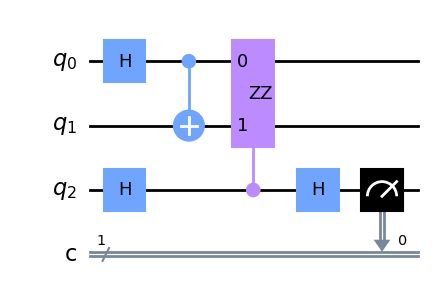

In [26]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import transpile
zz_gate_circ = QuantumCircuit(2, name = 'ZZ')
zz_gate_circ.z(range(2))
zz_gate = zz_gate_circ.to_gate()
czz = zz_gate.control()
bell_pair = QuantumCircuit(QuantumRegister(3, 'q'), ClassicalRegister(1,'c'))
bell_pair.h(0)
bell_pair.cx(0,1)
#need to figure out how to do ZZ measurement
#in microsofts notes it says individual sequential are not the same as simulataneous
#but in an [incomplete] qiskit tutorial they use .measure_all() to find exp. of ZZ
#and measure_all() seems to do the same as this;
#PAGE 472 OF THE BIBLE
#ZZ measurement 
bell_pair.h(2)
bell_pair.append(czz,[2,0,1])
bell_pair.h(2)
bell_pair.measure(2, 0)
bell_pair.decompose()
bell_pair.draw('mpl')

In [15]:
t_bell_pair = transpile(bell_pair, backend)
backend.run(t_bell_pair).result().get_counts()

{'0': 1024}

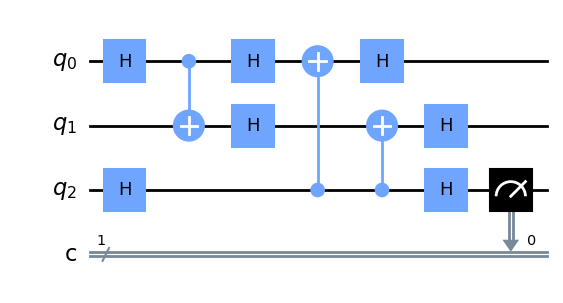

In [16]:
t_bell_pair.draw('mpl')

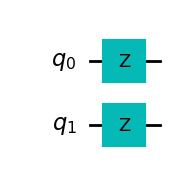

In [23]:
from qiskit.circuit import Gate
#zz_gate_circ.append(QuantumCircuit., [0,1])
zz_gate_circ.draw('mpl')

In [ ]:
range(2)

range(0, 2)

In [27]:
a = [1]
b = [2,3]
list(np.concatenate([a,b]))

[1, 2, 3]